In [1]:
# 1a. Fourier spectrum of original photo
import numpy as np
from skimage import io, color
from scipy import fftpack as fp
import matplotlib.pyplot as plt

# open image and convert to grayscale
ori = color.rgb2gray(io.imread('rektorat_ui.jpeg'))

# function to transform
def proceedFourier(originalImg):
    ft = fp.fft2(originalImg)
    fts = fp.fftshift(ft)
    ftsabs = abs(fts)
    ftlog = np.log(1+ftsabs)
    
    return ftlog

# show fourier spectrum
plt.imshow(proceedFourier(ori), cmap='gray'); plt.show()

<Figure size 640x480 with 1 Axes>

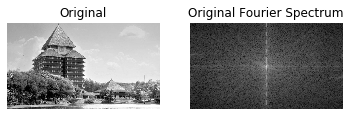

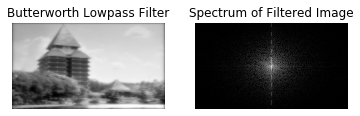

In [2]:
# 1b. Butterworth Low Pass Filter  & its fourier
from helper import *

w, l = paddedsize(ori.shape[0], ori.shape[1])

# membuat butterworth lowpass filter
# fungsi lpfilter terdapat di file helper.py
h = lpfilter('btw', w, l, 0.05 * w)
# menghitung DFT citra
f = fp.fft2(ori,(w,l))

# Apply lowpass filter
LPFS_lena = h*f

# convert ke domain spasial
LPF_lena = fp.ifft2(LPFS_lena).real
LPF_lena = LPF_lena[:ori.shape[0],:ori.shape[1]]

# Menampilkan fourier spectrum
Fc = fp.fftshift(f)
Fcf = fp.fftshift(LPFS_lena)

# fungsi abs untuk menghitung magnitude
S1 = np.log(1+abs(Fc))
S2 = np.log(1+abs(Fcf))

# show
plt.subplot(1,2,1); plt.imshow(ori, cmap='gray')
plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(S1, cmap='gray')
plt.title("Original Fourier Spectrum"); plt.axis("off")
plt.show()
plt.subplot(1,2,1); plt.imshow(LPF_lena, cmap='gray')
plt.title("Butterworth Lowpass Filter"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(S2, cmap='gray')
plt.title("Spectrum of Filtered Image"); plt.axis("off")
plt.show()

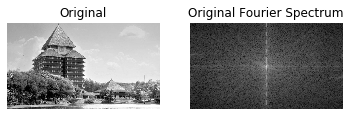

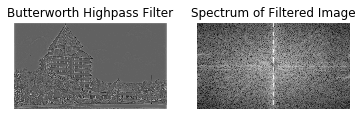

In [3]:
# 1c. Butterworth High Pass Filter & its fourier

w, l = paddedsize(ori.shape[0], ori.shape[1])

# membuat butterworth highpass filter
# fungsi hpfilter terdapat di file helper.py
h = hpfilter('btw', w, l, 0.09 * w)

# menghitung DFT citra
f = fp.fft2(ori,(w,l))

# Apply highpass filter
LPFS_lena = h*f

# convert ke domain spasial
LPF_lena = fp.ifft2(LPFS_lena).real
LPF_lena = LPF_lena[:ori.shape[0],:ori.shape[1]]

# Menampilkan fourier spectrum
Fc = fp.fftshift(f)
Fcf = fp.fftshift(LPFS_lena)

# fungsi abs untuk menghitung magnitude
S1 = np.log(1+abs(Fc))
S2 = np.log(1+abs(Fcf))

# show
plt.subplot(1,2,1); plt.imshow(ori, cmap='gray')
plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(S1, cmap='gray')
plt.title("Original Fourier Spectrum"); plt.axis("off")
plt.show()
plt.subplot(1,2,1); plt.imshow(LPF_lena, cmap='gray')
plt.title("Butterworth Highpass Filter"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(S2, cmap='gray')
plt.title("Spectrum of Filtered Image"); plt.axis("off")
plt.show()


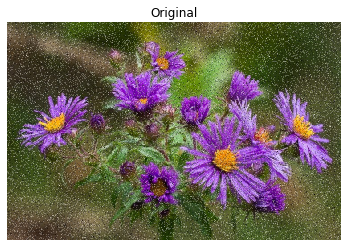

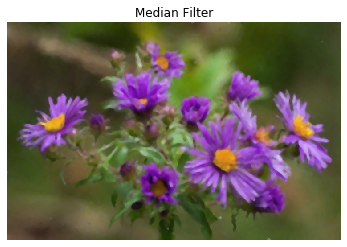

In [4]:
# 2a. Flower Noise Restoration
from skimage import util, filters
from cv2 import*

flower = io.imread('flowers_noisy.JPG')

# noise=util.img_as_ubyte(util.random_noise(flower,mode='s&p',salt_vs_pepper=0.03))
# fi=filters.rank.median(noise,selem=morphology.square(8))

fi = cv2.medianBlur(flower, 5)
fi2 = cv2.medianBlur(fi, 7)

plt.subplot(); plt.imshow(flower, cmap='gray')
plt.title('Original'); plt.axis("off")
plt.show()
plt.subplot(); plt.imshow(fi2, cmap='gray')
plt.title('Median Filter'); plt.axis("off")
plt.show()


In [18]:
# 2b. nilai PSNR (Peak Signal to Noise Ratio) dan MSE (Mean Square Error)
import numpy
import math

ori_fl = io.imread('flowers.JPG')

# PSNR
def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

# d=psnr(flower,fi2)
d=psnr(ori_fl,fi2)
print("psnr: {}".format(d))

#MSE
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(flower, fi2)
def MSE(Y, YH):
     return np.square(Y - YH).mean()
# print("mse: {}".format(MSE(flower,fi2)))
print("mse: {}".format(MSE(ori_fl,fi2)))

psnr: 31.761197829733216
mse: 43.34715291979096


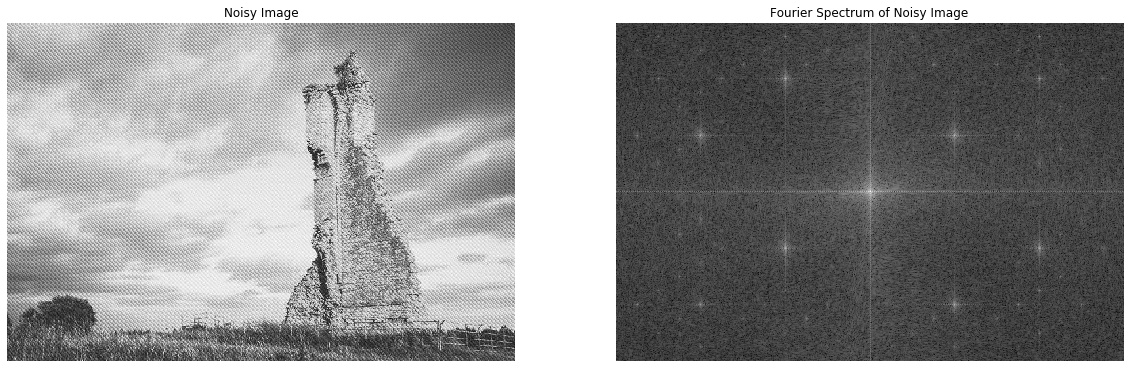

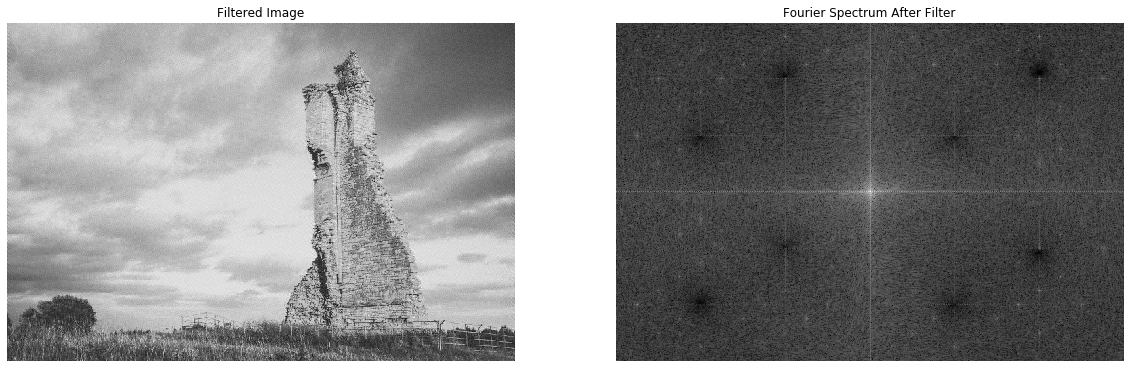

In [13]:
# 3a. Ruin Noise Restoration

ruin = color.rgb2gray(io.imread('ruin.jpg'))
    
# plt.imshow(proceedFourier(ruin), cmap='gray'); plt.show()

w, l = paddedsize(ruin.shape[0],ruin.shape[1])
F = fp.fft2(util.img_as_float(ruin),(w,l))
Fc = fp.fftshift(F)
S1 = np.log(1+abs(Fc))

# cover the noise according to x,y coordinate
H1 = notch('btw', w, l, 50, -250, 165)
H2 = notch('btw', w, l, 50, 250, 335)
H3 = notch('btw', w, l, 50, 250, -160)
H4 = notch('btw', w, l, 50, 500, -350)
H5 = notch('btw', w, l, 50, 500, 180)
H6 = notch('btw', w, l, 50, -250, -340)
H7 = notch('btw', w, l, 50, -500, -160)
H8 = notch('btw', w, l, 50, -500, 330)

# proceed
FS_ruin = F*H1*H2*H3*H4*H5*H6*H7*H8
F_ruin = fp.ifft2(FS_ruin).real
F_ruin = F_ruin[:ruin.shape[0],:ruin.shape[1]]
Fcf = fp.fftshift(FS_ruin)
S2 = np.log(1+abs(Fcf))

# show
plt.figure(figsize=(20,8))
plt.subplot(1,2,1); plt.imshow(ruin, cmap='gray')
plt.title('Noisy Image'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(S1, cmap='gray')
plt.title('Fourier Spectrum of Noisy Image'); plt.axis("off")
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(1,2,1); plt.imshow(F_ruin, cmap='gray')
plt.title('Filtered Image'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(S2, cmap='gray')
plt.title('Fourier Spectrum After Filter'); plt.axis("off")
plt.show()


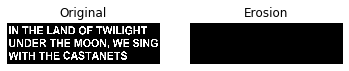

In [29]:
# 4. text NTHE
from skimage import morphology

original_image = color.rgb2gray(io.imread('teks.png'))

n_slice = original_image[19:56, 22:53]
N = (n_slice > 0.9) * 255

t_slice = original_image[19:56, 68:98]
T = (t_slice > 0.9) * 255

h_slice = original_image[19:56, 100:130]
H = (h_slice > 0.9) * 255

e_slice = original_image[19:56, 134:162]
E = (e_slice > 0.9) * 255


filtered = morphology.white_tophat(BW,N)

filtered = (filtered>0.9*255)

filtered = morphology.white_tophat(filtered,T)

filtered = (filtered>0.9*255)

filtered = morphology.white_tophat(filtered, E)

filtered = (filtered>0.9*255)


plt.subplot(1,2,1); plt.imshow(BW, cmap='gray')
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(f2, cmap='gray')
plt.title("Erosion"); plt.axis("off")
plt.show()


